**2. 서포트 벡터가 무엇인가요?**

**답** : (206pg) 도로 경계에 위치한 샘플이다. 

결정 경계는 도로 경계에 위치한 샘플에 의해 전적으로 결정되는데 이러한 샘플을 서포트 벡터라고 한다. 도로 바깥쪽에 샘플을 더 추가해도 결정 경계에는 아무런 영향을 미치지 않는다.


**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** : (206pg) SVM은 특성의 스케일에 민감하기 때문이다. 

예를 들어, 수직축의 스케일이 수평축의 스케일보다 훨씬 큰 경우, 결정 경계가 수평축에 거의 평행한다.

**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]).astype(np.float64)  # Iris virginica

In [3]:
C = 5 
alpha = 1 / (C * len(X))

In [4]:
# LinearSVC 학습하기

lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

# 위를 이용하여 데이터 스케일링 후 LinearSVC,SVC,SGDClassifier 구하기
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # X를 스케일링

lin_svc.fit(X_scaled,y)
svc.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SGDClassifier(alpha=0.0013333333333333333, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

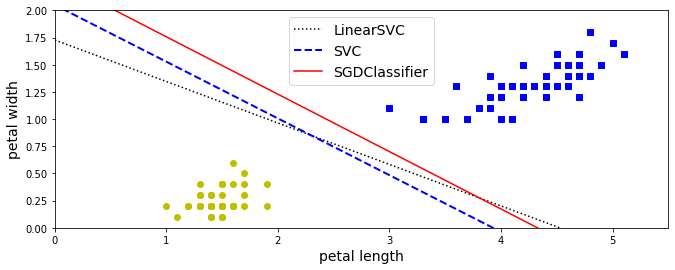

In [5]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 결제들의 기울기(W)와 편향(b)을 구함
## w : 두 기울기를 나눠 구함.
## b : 상수에 해당함.
w1 = -lin_svc.coef_[0,0] / lin_svc.coef_[0,1] 
b1 = -lin_svc.intercept_[0] / lin_svc.coef_[0,1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환하기
## 3개의 모델의 범위를 같게 하기 위해 사용
line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

# 세 개의 결정 경계를 모두 그리기
plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1], "k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",linewidth=2,label="SVC")
plt.plot(line3[:,0],line3[:,1],'r-',label="SGDClassifier")

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs') # label = Iris versicolor 
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo') # label = Iris setosa

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc='upper center',fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

# 아주 비슷한 결정 경계를 보인다. 

In [6]:
# 너무 어려울 경우 https://leechamin.tistory.com/83 참고 